In [4]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,  plot_confusion_matrix, roc_curve, auc, plot_roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import csv
import pandas as pd
df = pd.read_csv('data.csv')

## Two Features Sample Scatter

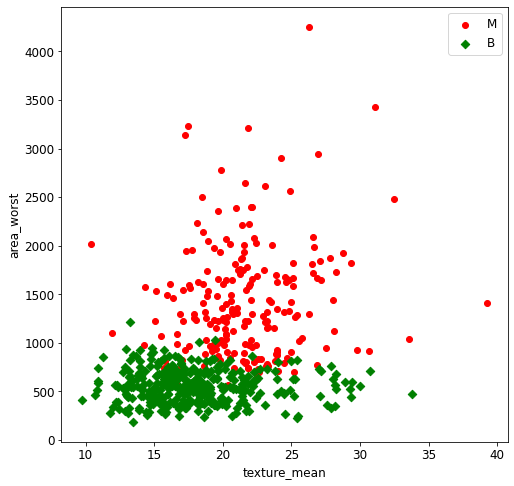

In [71]:
dfM = df[df['diagnosis'] == 'M']
dfB = df[df['diagnosis'] == 'B']
xlabel = dfM['texture_mean'].to_list()
ylabel = dfM['area_worst'].to_list()
plt.figure(figsize=(8, 8))
plt.scatter(xlabel,
            ylabel,
            marker='o',
            color='red',
            label='M')
xlabel = dfB['texture_mean'].to_list()
ylabel = dfB['area_worst'].to_list()
plt.scatter(xlabel, 
            ylabel, 
            marker='D',
            color='green',
            label='B')
plt.xlabel('texture_mean')
plt.ylabel('area_worst')
plt.legend()
plt.show()


In [10]:
X = df[["texture_mean", "area_worst"]]
Y = df["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [11]:
clf = KNeighborsClassifier(n_neighbors=35, p=2, weights='distance', algorithm='brute')
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=35, weights='distance')

In [12]:
pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.9415204678362573

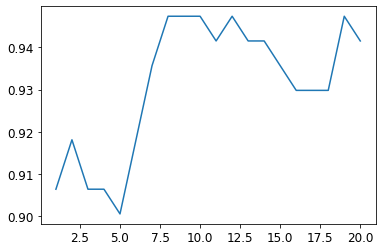

In [18]:
accuracy = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,  y_pred))
k_range = range(1, 21)
plt.plot(k_range, accuracy)
plt.show()

In [13]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[105   3]
 [  7  56]]
              precision    recall  f1-score   support

           B       0.94      0.97      0.95       108
           M       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [14]:
knn_cv = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn_cv, X, Y, cv=10)
print(cv_scores)
print('cv_scores mean:{}' .format(np.mean(cv_scores)))

[0.89473684 0.85964912 0.89473684 0.92982456 0.92982456 0.9122807
 0.94736842 0.92982456 0.92982456 0.94642857]
cv_scores mean:0.9174498746867167


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dx = X
dy = Y
dx = PCA(n_components=2).fit_transform(X)
dx = StandardScaler().fit_transform(X)
dx_train, dx_test, dy_train, dy_test = \
          train_test_split(dx, dy, test_size=0.2, random_state=0)


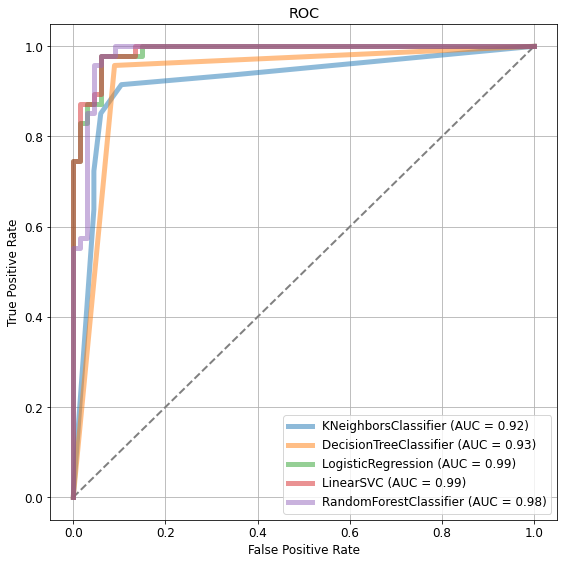

In [16]:
# 建立不同模型
models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    LinearSVC(),
    RandomForestClassifier()
    ]
# 訓練不同模型
for i, _ in enumerate(models):
    models[i].fit(dx_train, dy_train)
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 8))
# 建立子圖表
ax = plt.subplot(111)
ax.set_title('ROC')
# 畫對角線
ax.plot([0, 1], [0, 1], color='grey',
        linewidth=2, linestyle='--')
# 對每個模型畫 ROC 曲線
for model in models:
    plot_roc_curve(model, dx_test, dy_test,
                   linewidth=5, alpha=0.5, ax=ax)
plt.grid(True)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()

## Decision Tree Classifier max_depth 4 to 11

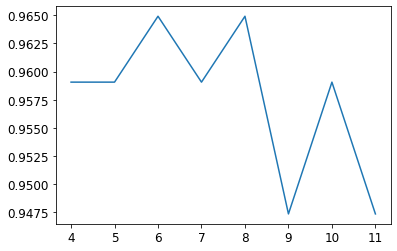

In [17]:
accuracy = []
for max_d in range(4, 12):
    dtc = DecisionTreeClassifier(max_depth=max_d)
    dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,  y_pred))
d_range = range(4, 12)
plt.plot(d_range, accuracy)
plt.show()